## Exploración gráfica de la distribución espacial de los registros

Habiendo cumplimentado el encargo, hemos decidido ir un poco más allá y tratar de entender **por qué todos los modelos empleados parecen haber tenido tan buen desempeño en la clasificación de nuestro dataset**, más teniendo en cuenta que solo hemos empleando 11 features de las de las 22 originales (que habían pasado a 106 tras el OneHotEncoder).

En este notebook exploraremos gráficamente la **distribución espacial de los diferentes registros**.

### Importo las librerías que voy a necesitar

In [1]:
#Para trabajar con mis DataFrames y codificar numéricamente mis features
import pandas as pd

#Para la creación de gráficos
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

#Para la reducción de dimensiones
from sklearn.decomposition import PCA

#Para separar en train y test, y para la validación cruzada
from sklearn.model_selection import train_test_split

#Fijo el máximo de filas a mostrar a 100 y el de columnas, a 50
pd.options.display.max_rows = 120
pd.options.display.max_columns = 50

### Importo el DataFrame que voy a utilizar

Es el df mushroom que he limpiado y acortado en el primer Notebook, que contiene 11 features y un target dicotómicos.

In [2]:
df_mushroom =  pd.read_csv("../data/df_mushroom_corto_11_ft.csv")

#Si queremos ver la distribución de los regristros en base a las 106 features 
#que teníamos antes de quedarnos únicamente con 11, cargar el siguiente dataset:
#df_mushroom =  pd.read_csv("../data/df_mushroom_largo.csv")

df_mushroom

bruises_f  odor_f  odor_n  gill-size_b  gill-color_b  \
0         False   False   False        False         False   
1         False   False   False         True         False   
2         False   False   False         True         False   
3         False   False   False        False         False   
4          True   False    True         True         False   
...         ...     ...     ...          ...           ...   
8119       True   False    True         True         False   
8120       True   False    True         True         False   
8121       True   False    True         True         False   
8122       True   False   False        False          True   
8123       True   False    True         True         False   

      stalk-surface-above-ring_k  stalk-surface-above-ring_s  \
0                          False                        True   
1                          False                        True   
2                          False                        True   
3                          False                        True   
4                          False                        True   
...                          ...                         ...   
8119                       False                        True   
8120                       False                        True   
8121                       False                        True   
8122                       False                        True   
8123                       False                        True   

      stalk-surface-below-ring_k  ring-type_p  spore-print-color_h  \
0                          False         True                False   
1                          False         True                False   
2                          False         True                False   
3                          False         True                False   
4                          False        False                False   
...                          ...          ...                  ...   
8119                       False         True                False   
8120                       False         True                False   
8121                       False         True                False   
8122                        True        False                False   
8123                       False         True                False   

      population_v  class  
0            False      1  
1            False      0  
2            False      0  
3            False      1  
4            False      0  
...            ...    ...  
8119         False      0  
8120          True      0  
8121         False      0  
8122          True      1  
8123         False      0  

[8124 rows x 12 columns]

### División en train/test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_mushroom.drop('class', axis = 1), 
                                                    df_mushroom['class'], 
                                                    test_size = 0.2, 
                                                    random_state = 50) 
#Mantengo la semilla de los dos Notebook anteriores, para contar con los mismos datos

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6499, 11)
X_test: (1625, 11)
y_train: (6499,)
y_test: (1625,)


### Representación gráfica de los registros del dataset

Quiero visualizar **cómo se distribuyen los datos** (tanto de train como de test) **a lo largo de 2 y 3 dimensiones**, lo que nos puede ayudar a hacernos una idea de lo fácil o difícil que puede resultar su clasificación. Esto es, si las observaciones de las dos clases (comestibles vs venenosas) están muy separadas entre sí, esto podría explicar porqué los modelos no suelen cometer errores a la hora de clasificarlas.

Para poder dibujar 11 features en solo 2 o 3 dimensiones, nos apoyaremos en el PCA para reducción de dimensionalidad.

##### Representación de los datos de TRAIN en 2D

Dimensiones originales de X_train: (6499, 11)
Dimensiones de X_train tras PCA con 2D: (6499, 2)


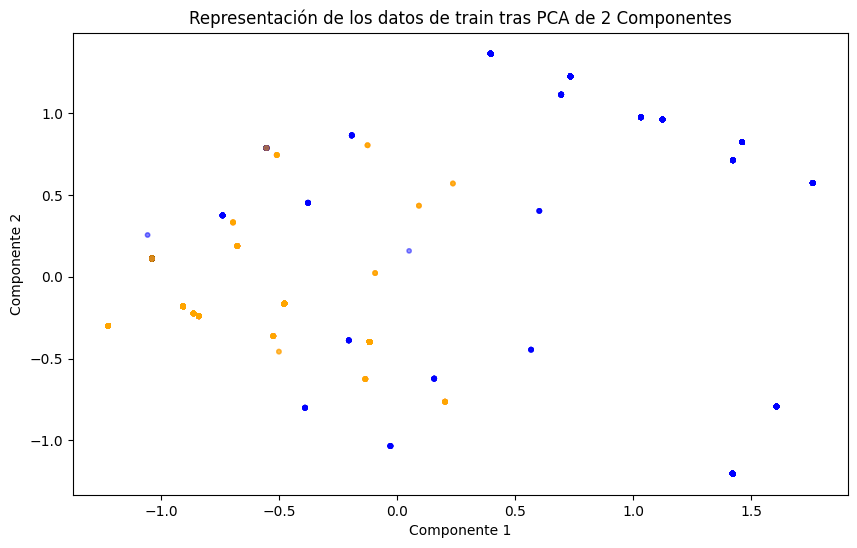

In [4]:
#Creo un objeto PCA para reducir las dimensiones de train de 11 a 2
pca = PCA(n_components = 2, random_state = 44)
X_train_PCA_2D = pca.fit_transform(X_train)

#Imprimo las dimensiones originales y las dimensiones después de PCA
print("Dimensiones originales de X_train:", X_train.shape)
print("Dimensiones de X_train tras PCA con 2D:", X_train_PCA_2D.shape)  

#Defino los colores para mis clases (comestibles en naranja y venosas en azul)
class_colores = {0: 'orange', 1: 'blue'}
colores = y_train.map(class_colores)

#Creo un scatter plot con las dos dimensiones resultantes del PCA
plt.figure(figsize = (10, 6))
plt.scatter(X_train_PCA_2D[:, 0], X_train_PCA_2D[:, 1], c = colores, alpha = 0.1, s = 10)
plt.title('Representación de los datos de train tras PCA de 2 Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

##### Representación de los datos de TRAIN en 3D

In [5]:
#Creo un objeto PCA para reducir las dimensiones de train de 11 a 3
pca = PCA(n_components = 3, random_state = 44)
X_train_PCA_3D = pca.fit_transform(X_train)

#Imprimo las dimensiones originales y las dimensiones después de PCA
print("Dimensiones originales de X_train:", X_train.shape)
print("Dimensiones de X_train tras PCA con 3D:", X_train_PCA_3D.shape)  

#Defino los colores para mis clases (comestibles en naranja y venenosas en azul)
class_colores = {0: 'orange', 1: 'blue'}
colores = y_train.map(class_colores)

#Defino lso datos de mi scatterplot en 3D
data_scatter3d = go.Scatter3d(x = X_train_PCA_3D[:, 0],
                      y = X_train_PCA_3D[:, 1],
                      z = X_train_PCA_3D[:, 2],
                      mode = 'markers',
                      marker = dict(size = 5, color = colores))

#Defino las etiquetas de los ejes y delimito los márgenes
aspecto_scatter3d = go.Layout(scene = dict(xaxis = dict(title = 'Componente 1'),
                              yaxis = dict(title = 'Componente 2'),
                              zaxis = dict(title = 'Componente 3')),
                   margin = dict(l = 0, r = 0, b = 0, t = 0))

#Combino los datos y el aspecto de mi scatter en 3D
fig = go.Figure(data = [data_scatter3d], layout = aspecto_scatter3d)

#Muestro el gráfico
iplot(fig)

Dimensiones originales de X_train: (6499, 11)
Dimensiones de X_train tras PCA con 3D: (6499, 3)


##### Representación de los datos de TEST en 2D

Dimensiones originales de X_test: (1625, 11)
Dimensiones de X_test tras PCA: (1625, 2)


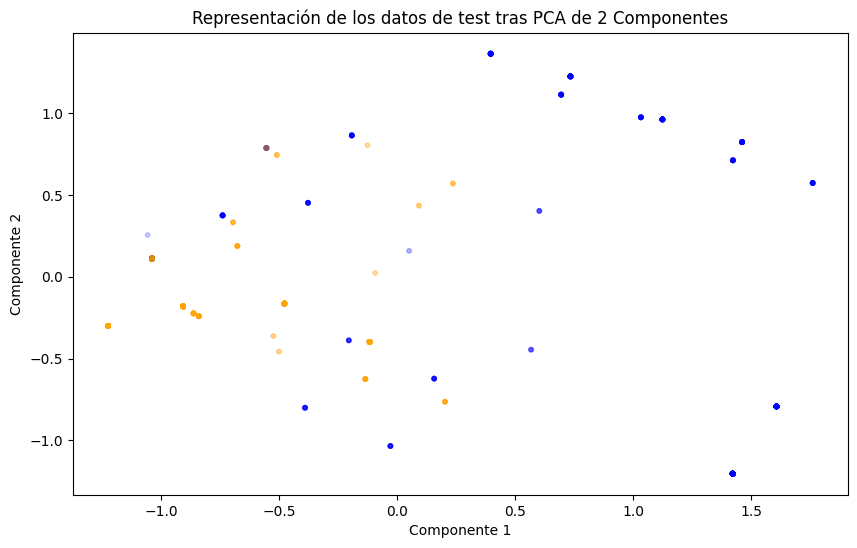

In [6]:
#Creo un objeto PCA para reducir las dimensiones de test de 11 a 2
pca = PCA(n_components = 2)
pca.fit(X_train)
X_test_PCA_2D = pca.transform(X_test)

#Imprimo las dimensiones originales y las dimensiones después de PCA
print("Dimensiones originales de X_test:", X_test.shape)
print("Dimensiones de X_test tras PCA:", X_test_PCA_2D.shape)  

#Defino los colores para mis clases (comestibles en naranja y venosas en azul)
class_colores = {0: 'orange', 1: 'blue'}
colores = y_test.map(class_colores)

#Creo un scatter plot con las dos dimensiones resultantes del PCA
plt.figure(figsize = (10, 6))
plt.scatter(X_test_PCA_2D[:, 0], X_test_PCA_2D[:, 1], c = colores, alpha = 0.1, s = 10)
plt.title('Representación de los datos de test tras PCA de 2 Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

##### Representación de los datos de TEST en 3D

In [7]:
#Creo un objeto PCA para reducir las dimensiones de test de 11 a 3
pca = PCA(n_components = 3, random_state = 44)
pca.fit(X_train)
X_test_PCA_3D = pca.transform(X_test)

#Imprimo las dimensiones originales y las dimensiones después de PCA
print("Dimensiones originales de X_test:", X_test.shape)
print("Dimensiones de X_test tras PCA con 3D:", X_test_PCA_3D.shape)  

#Defino los colores para mis clases (comestibles en naranja y venenosas en azul)
class_colores = {0: 'orange', 1: 'blue'}
colores = y_test.map(class_colores)

#Defino lso datos de mi scatterplot en 3D
data_scatter3d = go.Scatter3d(x = X_test_PCA_3D[:, 0],
                      y = X_test_PCA_3D[:, 1],
                      z = X_test_PCA_3D[:, 2],
                      mode = 'markers',
                      marker = dict(size = 5, color = colores))

#Defino las etiquetas de los ejes y delimito los márgenes
aspecto_scatter3d = go.Layout(scene = dict(xaxis = dict(title = 'Componente 1'),
                              yaxis = dict(title = 'Componente 2'),
                              zaxis = dict(title = 'Componente 3')),
                   margin = dict(l = 0, r = 0, b = 0, t = 0))

#Combino los datos y el aspecto de mi scatter en 3D
fig = go.Figure(data = [data_scatter3d], layout = aspecto_scatter3d)

#Muestro el gráfico
iplot(fig)

Dimensiones originales de X_test: (1625, 11)
Dimensiones de X_test tras PCA con 3D: (1625, 3)


Al observar las cuatro representaciones gráficas, podemos obtener varias conclusiones:

1) Si bien en los gráficos bidimensionales no se aprecia una división clara entre los datos, esto es más fácilmente observable en las gráficas tridimensionales. Con lo cual, es probable que nuestros datos estén bien diferenciados, lo que estaría ayudando al modelo.

2) En las cuatro representaciones solo vemos unos cuantos puntos, pese a tener más de 8000 registros. Esto podría deberse a que, al haber definido nuestro dataset únicamente en base a 11 features, hemos perdido información y matices, de manera que muchos registros ahora aparecen como réplicas o duplicados de otros.

3) Como consecuencia de lo anterior, se podría explicar que los datos representados en train y test son prácticamente iguales. Lo que también explicaría el buen desempeño del modelo con los datos de test.

In [8]:
#Efectivamente verificamos que nuestra segundo conclusión había sido acertada

num_filas_totales = len(df_mushroom)
num_filas_duplicadas = df_mushroom.duplicated().sum() #la suma de los True
num_filas_sin_duplicar = num_filas_totales - num_filas_duplicadas

print(f'En nuestro dataset contamos con {num_filas_sin_duplicar} filas diferentes \
y el resto ({num_filas_duplicadas} filas) son copias de las anteriores')

En nuestro dataset contamos con 42 filas diferentes y el resto (8082 filas) son copias de las anteriores
